In [1]:
using Revise
includet("diatomic.jl")

using .diatomic_jl.MoleculeTypes
using .diatomic_jl


In [2]:
MoleculeOperator = Molecule.generateMolecule(Rb87Cs133, 2)
beams = Dict("B" =>Hamiltonian.OpticalBeam([0.0, 1.0, 0.0], [0, 1.0, 0.0]))
Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])

In [3]:
IntensityScan = solve.scanIntensity(Hmol_I, 154.5e-4, 0.0, [0:0.4:40...]*1e7);

In [4]:
Q0 =  State([0.0, 0.0, 1.5, 3.5, 1.5, 1.5], Hmol_I)
Q1 =  State([0.0, 0.0, 3.5, 3.5, 0.5, 1.5], Hmol_I)
Q0_qn  = calculate.findMaxOverlap(Q0, IntensityScan[1].vec)
Q1_qn = calculate.findMaxOverlap(Q1, IntensityScan[1].vec)
#println(calculate.KetName(State(IntensityScan[1].vec[:, Q0_qn]), Hmol_I))

5

In [5]:
diabaticOrder = calculate.diabaticOrder(Hmol_I, IntensityScan, rev = false);

In [6]:
energyDiff = [sol_i.val[Q1_qn] for sol_i in diabaticOrder] .-[sol_i.val[Q0_qn] for sol_i in diabaticOrder]

101-element Vector{Float64}:
 76985.01484897692
 76984.81157159677
 76984.60830661817
 76984.40503627772
 76984.2017680984
 76983.99849515152
 76983.7952261836
 76983.59195550904
 76983.38868009445
 76983.18540778413
     ⋮
 76966.31267389632
 76966.10937201319
 76965.90607216355
 76965.70277418976
 76965.4994728713
 76965.2961695402
 76965.09286810324
 76964.88956547627
 76964.6862619879

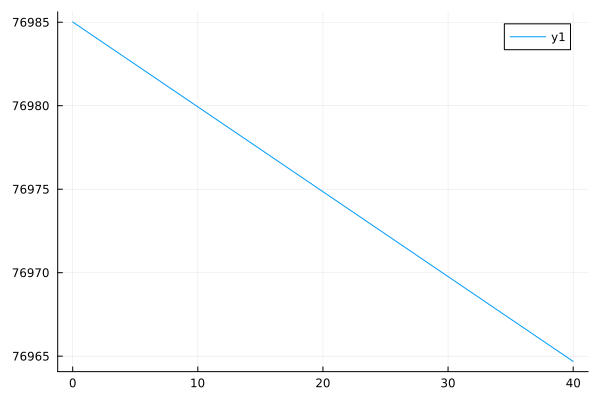

In [7]:
using Plots
Int_scan = [sol_i.Intensity[1] for sol_i in diabaticOrder].*1e-7
plot(Int_scan, energyDiff)

In [8]:

linearPol(φ) = [0, sin(φ), cos(φ)]
angle = [0, 55.5, 90]*pi/180#-pi/2:0.01:pi/2

energyScan = []
for ang in angle

    MoleculeOperator = Molecule.generateMolecule(Rb87Cs133, 2)
    beams = Dict("B" =>Hamiltonian.OpticalBeam([1.0, 0.0, 0.0],linearPol(ang)))
    Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])
    IntensityScan = solve.scanIntensity(Hmol_I, 154.5e-4, 0.0, [0:0.4:40...]*1e7);
    Q0 =  State([0.0, 0.0, 1.5, 3.5, 1.5, 1.5], Hmol_I)
    Q1 =  State([0.0, 0.0, 3.5, 3.5, 0.5, 1.5], Hmol_I)
    Q0_qn  = calculate.findMaxOverlap(Q0, IntensityScan[1].vec)
    Q1_qn = calculate.findMaxOverlap(Q1, IntensityScan[1].vec)
    diabaticOrder = calculate.diabaticOrder(Hmol_I, IntensityScan, rev = false);
    push!(energyScan, [sol_i.val[Q1_qn] for sol_i in diabaticOrder] .-[sol_i.val[Q0_qn] for sol_i in diabaticOrder] .- 76e3)
end

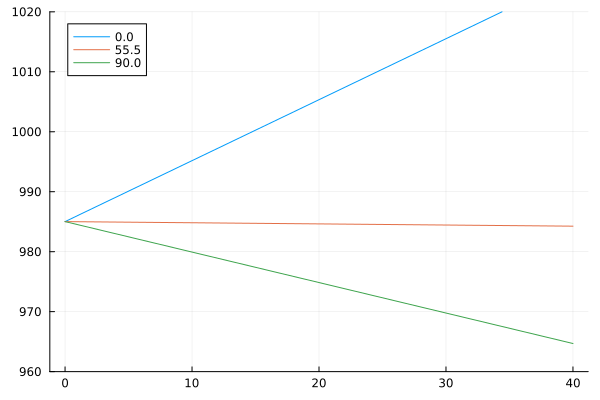

In [9]:
Int_scan = [sol_i.Intensity[1] for sol_i in diabaticOrder].*1e-7
plot(Int_scan, energyScan[1], label = angle[1]*180/pi)
plot!(Int_scan, energyScan[2], label = angle[2]*180/pi)
plot!(Int_scan, energyScan[3], label = angle[3]*180/pi)
ylims!((960, 1020))

In [19]:
angle_scan = 0:0.1:pi/2
δ = []
for ang in angle_scan
    MoleculeOperator = Molecule.generateMolecule(Rb87Cs133, 2)
    beams = Dict("B" =>Hamiltonian.OpticalBeam([1.0, 0.0, 0.0],linearPol(ang)))
    Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])
    IntensityScan = solve.scanIntensity(Hmol_I, 154.5e-4, 0.0, 15.3*1e7);
    Q0 =  State([0.0, 0.0, 1.5, 3.5, 1.5, 1.5], Hmol_I)
    Q1 =  State([0.0, 0.0, 3.5, 3.5, 0.5, 1.5], Hmol_I)
    Q0_qn  = calculate.findMaxOverlap(Q0, IntensityScan[1].vec)
    Q1_qn = calculate.findMaxOverlap(Q1, IntensityScan[1].vec)
    diabaticOrder = calculate.diabaticOrder(Hmol_I, IntensityScan, rev = false);
    push!(δ, (diabaticOrder[1].val[Q1_qn]  -  diabaticOrder[1].val[Q0_qn]).- 76e3)
end

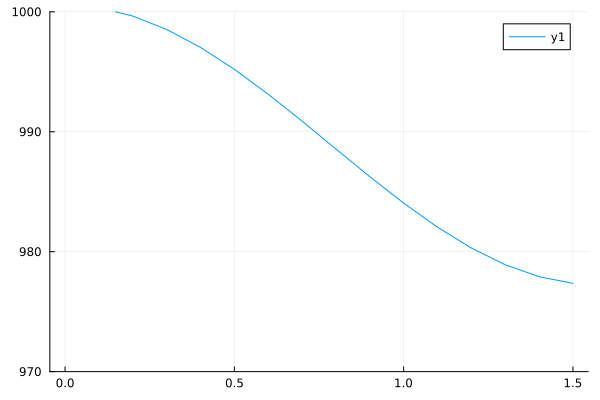

In [25]:
plot(angle_scan, δ)
ylims!((970, 1000))